In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img= cv2.imread('test_image.jpg')
# ba estefade azin function ma ax ra mitavanim bekhanim

In [3]:
img.shape

(704, 1279, 3)

In [14]:
# cv2.imshow('image', image)
# cv2.waitKey(0)
# baraye namayeshe ax az code bala estefade mikonim
# waitKey baraye ma ax ra negah midarad ta zamani ke khodeman bebandim anra

In [6]:
lane_image = np.copy(img)
# yek copy az ax misazim, chera `lane_image = image` nemikonim, chon har goone taghir dar image dar laneimage niz bevojod miayad

In [37]:
gray_image = cv2.cvtColor(lane_image,cv2.COLOR_RGB2GRAY)
# ax ra tabdil be `siyah_sefid` mikonim. chera?? chon dar ax avalie rang hayi az teyfe sabz o ghermez o abi vojod darad
# va tashkhis range khatkeshie khiaban ke sefid az az beyne in 3 chanal rang sakht tar ast ta tashkhise an az yek kanal rangi

In [38]:
blur_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
# bevasile methode GaussianBlur ma meghdare noise ax ra kam mikonim va ax ra smoothness mikonim baraye tashkhise behtare 
# gooshe haye ax ya haman khat keshie khiaban
# meghdare (5,5) meghdari ast delbekhahi ke bar aye har axi mitavand motefavet bashad. ama meghdare (5,5) mamoolan baraye
# bishtare axha monaseb ast. dar vaghe meghdare abaad pixel baraye khata giri ast

In [40]:
canny_image = cv2.Canny(blur_image, 50, 150)
# dar in methode ma bevasile ekhtelafe beyne roshanayi va ekhtelafe range pixel haye ax ke bevasile ekhtelafe adad pixel ha
# bedast miyaad, mitavanim khotote khiaban va jahayi ke ekhtelaf rang darand ra sefid neshan dahim, va baghye ghesmat hara 
# siyah neshan midahim

baraye behine kardane code ma code haye balara dar yek tabe jaygozari mikonim

In [7]:
def canny(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur_image = cv2.GaussianBlur(gray_image, (5,5),0)
    canny_image = cv2.Canny(blur_image, 50, 150)
    return canny_image

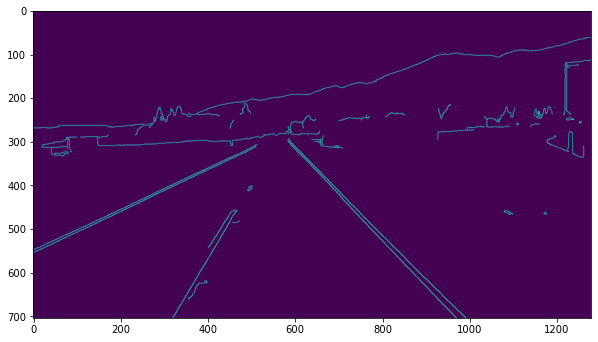

In [8]:
plt.figure(figsize=(10,7))
canny_photo = canny(lane_image)
plt.imshow(canny_photo)
plt.show()
#hamchenin az plt ingoone baraye tarsime axha estefade mikonim

ma mikhahim khatkeshie samte raste khiaban ra ke masire mashin hast ra
ke yek halate mosalas hast ra az tasvir joda konim baraye inkar ...

In [11]:
def region_of_interest(image):
    height = image.shape[0]
    triangle = np.array([
        [(200, height),(1100, height),(550, 250)]
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, triangle, 255)
    masked_image = cv2.bitwise_and(image,mask)
    return masked_image

In [15]:
# dar tabe bala ma ebteda yek mosalas az ax bala ke khat keshie khiaban dar samte rast hast ra joda mikonim va anra 
# be range sefid dar miyavarim, `height`: ertefa har ax hast,
# `triangle`: mokhtasate masire mosalasi shekl khiaban ast ke mikhahim be range sefid dar biavarim
# `mask`: kole ax ra be range meshki (ya haman teyfe range 0) tabdil mikonad
# `cv2.fillPoly`: dar mask ghesmate triangle ra be range 255(sefid) tabdil mikonad va baghye ax ra siyah negah midarad
# pas ta beinja ma dar `mask` ke kamelan siyah bood yek mosalase too por ra ke masire mashin hast ra be range sefid darim
# albate ma mokhtasate mosalas ra az khat keshie khiaban bishtar grftim chon mikhahim ba ax canny `and` konim va khat keshie khiaban ra dar biyavarim
# `masked_image`: beyne `canny_photo` va `mask` ebarate and ra anjam midahad va faghat noghte moshtarake sefidie beyne 
# canny_photo va mask ra negah midarad chon dar har 2ax in noghat 1,1 hastand va baghye jaha ya 0,0|0,1|1,0 hastand (1=sefid,0=siyah)

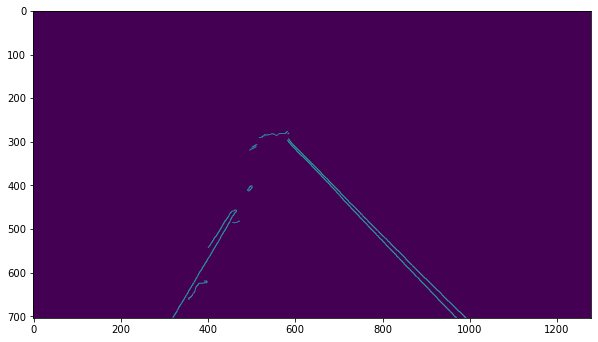

In [12]:
plt.figure(figsize=(10,7))
plt.imshow(region_of_interest(canny_photo))